#### Import required packages

In [1]:
%matplotlib inline
from mantid.simpleapi import *
import matplotlib.pyplot as plt
from mantid import plots

Set a larger default figure size

In [2]:
plt.rcParams['figure.figsize'] = [12, 6]

#### Set IPTS number

In [3]:
IPTS = 7776

#### Load data (silicon), run number 26506

In [4]:
data = LoadWAND(IPTS=IPTS, RunNumbers=26506)

alternatively provide filename

In [5]:
data = LoadWAND('/HFIR/HB2C/IPTS-7776/nexus/HB2C_26506.nxs.h5')

#### Load vanadium

In [6]:
vanadium = LoadWAND(IPTS=IPTS, RunNumbers=26509)

#### Run WANDPowderReduction algorithm

In [7]:
WANDPowderReduction(InputWorkspace=data,
                    CalibrationWorkspace=vanadium,
                    Target='Theta',
                    NumberBins=1000,
                    OutputWorkspace='silicon_powder')

Workspace2D
Title: Si 2theta 2.5
Histograms: 1
Bins: 1000
Data points
X axis: Scattering angle / degrees
Y axis: Counts
Distribution: True
Instrument: WAND (2018-Feb-20 to 2100-Jan-31)Instrument from: /opt/mantidnightly/instrument/WAND_Definition_2018_02_20.xml

Parameters from: /opt/mantidnightly/instrument/WAND_Parameters.xml
Run start: 2018-Mar-12 15:41:08
Run end:  2018-Mar-12 16:01:08

#### Plot results using matplotlib

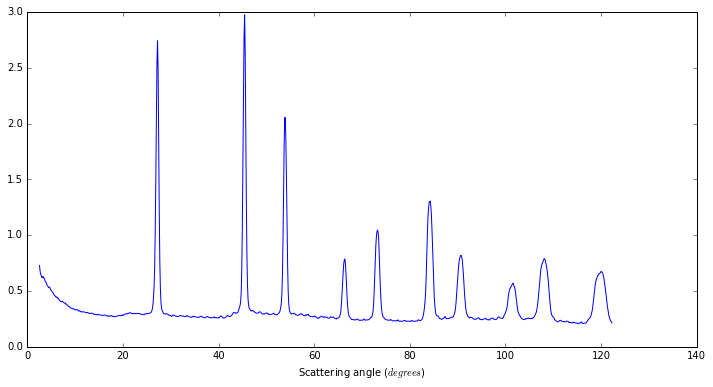

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(mtd['silicon_powder'])

#### Silicon powder to Q over limited range

In [9]:
WANDPowderReduction(InputWorkspace=data,
                    CalibrationWorkspace=vanadium,
                    Target='ElasticQ',
                    XMin=4.5,
                    Xmax=6.25,
                    NumberBins=500,
                    OutputWorkspace='silicon_powder_q')

Workspace2D
Title: Si 2theta 2.5
Histograms: 1
Bins: 500
Data points
X axis: q / Angstrom^-1
Y axis: Counts
Distribution: True
Instrument: WAND (2018-Feb-20 to 2100-Jan-31)Instrument from: /opt/mantidnightly/instrument/WAND_Definition_2018_02_20.xml

Parameters from: /opt/mantidnightly/instrument/WAND_Parameters.xml
Run start: 2018-Mar-12 15:41:08
Run end:  2018-Mar-12 16:01:08

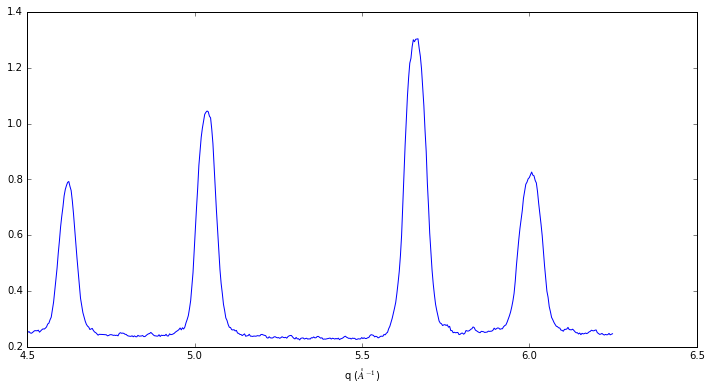

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(mtd['silicon_powder_q'])

#### Silicon powder to D spacing

In [11]:
WANDPowderReduction(InputWorkspace=data,
                    CalibrationWorkspace=vanadium,
                    Target='ElasticDSpacing',
                    Xmax=5,
                    NumberBins=1000,
                    OutputWorkspace='silicon_powder_d_spacing')

Workspace2D
Title: Si 2theta 2.5
Histograms: 1
Bins: 1000
Data points
X axis: d-Spacing / Angstrom
Y axis: Counts
Distribution: True
Instrument: WAND (2018-Feb-20 to 2100-Jan-31)Instrument from: /opt/mantidnightly/instrument/WAND_Definition_2018_02_20.xml

Parameters from: /opt/mantidnightly/instrument/WAND_Parameters.xml
Run start: 2018-Mar-12 15:41:08
Run end:  2018-Mar-12 16:01:08

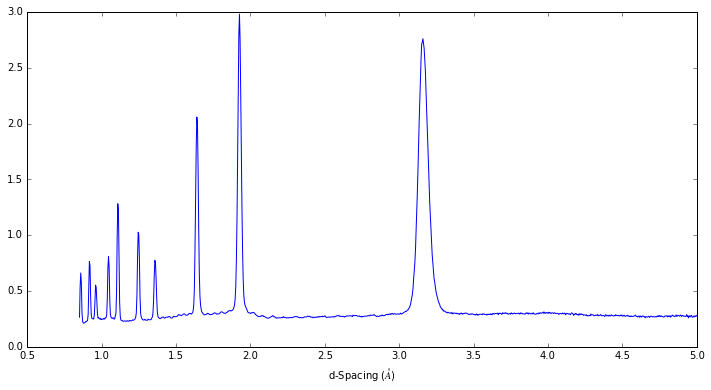

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(mtd['silicon_powder_d_spacing'])

### Loading and processing multiple file

In [13]:
multiple_data = LoadWAND(IPTS=7776, RunNumbers='26506,26507')

or range

In [14]:
multiple_data = LoadWAND(IPTS=7776, RunNumbers='26506-26507')

or filenames

In [15]:
multiple_data = LoadWAND('/HFIR/HB2C/IPTS-7776/nexus/HB2C_26506.nxs.h5,/HFIR/HB2C/IPTS-7776/nexus/HB2C_26507.nxs.h5')

the data will be loaded into a group with name `multiple_data`

In [16]:
WANDPowderReduction(InputWorkspace=multiple_data,
                    CalibrationWorkspace=vanadium,
                    Target='Theta',
                    NumberBins=1000,
                    OutputWorkspace='multiple_output')

WorkspaceGroup
 -- multiple_output_1
 -- multiple_output_2

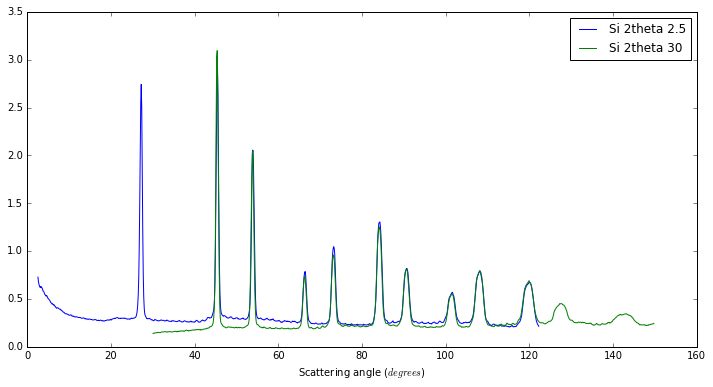

In [17]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(mtd['multiple_output_1'],label=mtd['multiple_output_1'].getTitle())
ax.plot(mtd['multiple_output_2'],label=mtd['multiple_output_2'].getTitle())
ax.legend()

## See also

* [LoadWAND](http://docs.mantidproject.org/nightly/algorithms/LoadWAND.html)
* [WANDPowderReduction](http://docs.mantidproject.org/nightly/algorithms/WANDPowderReduction.html)
* [Introduction to Matplotlib in Mantid](http://docs.mantidproject.org/nightly/plotting/)
* [mantid.plots](http://docs.mantidproject.org/nightly/api/python/mantid/plots/)